In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob


In [3]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [8]:
path = "results/linear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_1.csv', 'results/linear_multi\\linear_dgp_10.csv', 'results/linear_multi\\linear_dgp_11.csv', 'results/linear_multi\\linear_dgp_12.csv', 'results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_16.csv', 'results/linear_multi\\linear_dgp_17.csv', 'results/linear_multi\\linear_dgp_18.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_2.csv', 'results/linear_multi\\linear_dgp_20.csv', 'results/linear_multi\\linear_dgp_21.csv', 'results/linear_multi\\linear_dgp_22.csv', 'results/linear_multi\\linear_dgp_23.csv', 'results/linear_multi\\linear_dgp_24.csv', 'results/linear_multi\\linear_dgp_25.csv', 'results/linear_multi\\linear_dgp_26.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_28.csv', 'results/linear_multi\\linear_dgp_29.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/line

In [12]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE   q025   q975  covering  \
0      1.0  1.554   1.554  1.574 -0.020  0.055  0.058  1.447  1.660       1.0   
1      1.0  1.556   1.556  1.574 -0.018  0.056  0.059  1.446  1.666       1.0   
2      1.0  1.456   1.456  1.574 -0.118  0.062  0.133  1.333  1.578       1.0   
3      1.0  1.472   1.474  1.574 -0.102  0.082  0.131  1.311  1.631       1.0   
4      1.0  1.616   1.617  1.574  0.042  0.094  0.103  1.433  1.805       1.0   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...       ...   
195  306.0  1.138   1.136  1.382 -0.244  0.078  0.256  0.989  1.296       0.0   
196  306.0  1.424   1.424  1.494 -0.070  0.052  0.087  1.322  1.527       1.0   
197  306.0  1.424   1.424  1.494 -0.070  0.053  0.088  1.318  1.526       1.0   
198  306.0  1.349   1.350  1.494 -0.145  0.063  0.157  1.225  1.471       0.0   
199  306.0  1.377   1.377  1.494 -0.117  0.088  0.147  1.206  1.554       1.0   

              method estima

In [41]:
combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [40]:
def coverage_perc(x):
    return np.mean(x)*100

df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean', 'median'],
                                         'median' : ['mean', 'median'],
                                         'std' : ['mean', 'median'],
                                         'bias' : ['mean', 'median'],
                                         'true' : ['mean', 'std'],
                                         'RMSE' : ['mean', 'median'],
                                         'q025' : ['mean', 'median'],
                                         'q975' : ['mean', 'median'],
                                         'ci_length' : ['mean', 'median'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


estimand   model    type      mean            median               std  \
                                 mean  median      mean  median      mean   
0   dynamic      GP      1S  1.655330  1.6440  1.658680  1.6440  0.075713   
1   dynamic      GP      2S  1.525853  1.5040  1.529140  1.5110  0.079040   
2   dynamic      GP      3S  1.524423  1.5050  1.528880  1.5100  0.086547   
3   dynamic      GP    Obs.  1.822663  1.7770  1.824597  1.8155  0.141773   
4   dynamic      GP  Oracle  1.632377  1.6125  1.637487  1.6120  0.061260   
5   dynamic  Linear      1S  1.687487  1.6465  1.687530  1.6465  0.063260   
6   dynamic  Linear      2S  1.545610  1.5270  1.544570  1.5265  0.069780   
7   dynamic  Linear      3S  1.547827  1.5290  1.545503  1.5270  0.076540   
8   dynamic  Linear    Obs.  1.858323  1.8865  1.858300  1.8860  0.093533   
9   dynamic  Linear  Oracle  1.642937  1.6180  1.642920  1.6175  0.050803   
10    stoch      GP      1S  1.408540  1.4070  1.412483  1.4090  0.113547   
11    stoch      GP      2S  1.222747  1.2065  1.225993  1.2110  0.093083   
12    stoch      GP      3S  1.219407  1.2065  1.223737  1.2075  0.099020   
13    stoch      GP    Obs.  1.403833  1.4075  1.405383  1.4140  0.110927   
14    stoch      GP  Oracle  1.413483  1.4160  1.419453  1.4160  0.074923   
15    stoch  Linear      1S  1.475373  1.4830  1.475453  1.4825  0.070800   
16    stoch  Linear      2S  1.271013  1.2760  1.270153  1.2760  0.073383   
17    stoch  Linear      3S  1.271740  1.2770  1.269797  1.2750  0.078103   
18    stoch  Linear    Obs.  1.430290  1.4405  1.430273  1.4410  0.080697   
19    stoch  Linear  Oracle  1.441017  1.4155  1.441063  1.4160  0.053493   

               bias  ...      true      RMSE              q025          \
   median      mean  ...       std      mean  median      mean  median   
0   0.066  0.033430  ...  0.121399  0.122490  0.1090  1.507367  1.5145   
1   0.068 -0.096047  ...  0.121399  0.143337  0.1170  1.366267  1.3720   
2   0.072 -0.097477  ...  0.121399  0.149320  0.1180  1.359240  1.3690   
3   0.132  0.200763  ...  0.121399  0.259107  0.2460  1.540590  1.5125   
4   0.051  0.010477  ...  0.121399  0.077267  0.0600  1.513717  1.5100   
5   0.063  0.065587  ...  0.121399  0.115970  0.1105  1.563393  1.5270   
6   0.069 -0.076290  ...  0.121399  0.122000  0.1025  1.411537  1.3950   
7   0.075 -0.074073  ...  0.121399  0.125440  0.1060  1.403990  1.3920   
8   0.095  0.236423  ...  0.121399  0.261620  0.2615  1.675123  1.7090   
9   0.051  0.021037  ...  0.121399  0.068143  0.0605  1.543353  1.5140   
10  0.100 -0.213360  ...  0.121399  0.258570  0.1995  1.182083  1.1970   
11  0.081 -0.199253  ...  0.039722  0.223887  0.1975  1.034533  1.0425   
12  0.085 -0.202593  ...  0.039722  0.229240  0.2000  1.027110  1.0355   
13  0.100 -0.218067  ...  0.121399  0.251000  0.2400  1.183847  1.1730   
14  0.066 -0.208417  ...  0.121399  0.229050  0.2515  1.264060  1.2870   
15  0.069 -0.146527  ...  0.121399  0.178020  0.1730  1.336577  1.3405   
16  0.071 -0.150987  ...  0.039722  0.170340  0.1500  1.129203  1.1310   
17  0.076 -0.150260  ...  0.039722  0.172040  0.1525  1.123857  1.1230   
18  0.080 -0.191610  ...  0.121399  0.215233  0.1820  1.272153  1.2965   
19  0.053 -0.180883  ...  0.121399  0.192387  0.1935  1.336160  1.3175   

        q975         ci_length              covering  
        mean  median      mean  median coverage_perc  
0   1.794543  1.7660  0.287177  0.2585     80.000000  
1   1.669103  1.6490  0.302837  0.2660     60.000000  
2   1.684920  1.6650  0.325680  0.2840     60.000000  
3   2.095323  2.0665  0.554733  0.5220     70.666667  
4   1.740310  1.7150  0.226593  0.1990    100.000000  
5   1.811533  1.7680  0.248140  0.2470     75.666667  
6   1.685350  1.6640  0.273813  0.2715     70.000000  
7   1.704663  1.6795  0.300673  0.2950     73.000000  
8   2.041897  2.0635  0.366773  0.3710     20.000000  
9   1.742540  1.7195  0.199187  0.1990    100.000000  
10  1.621470  1.601

Text(0, 0.5, '')

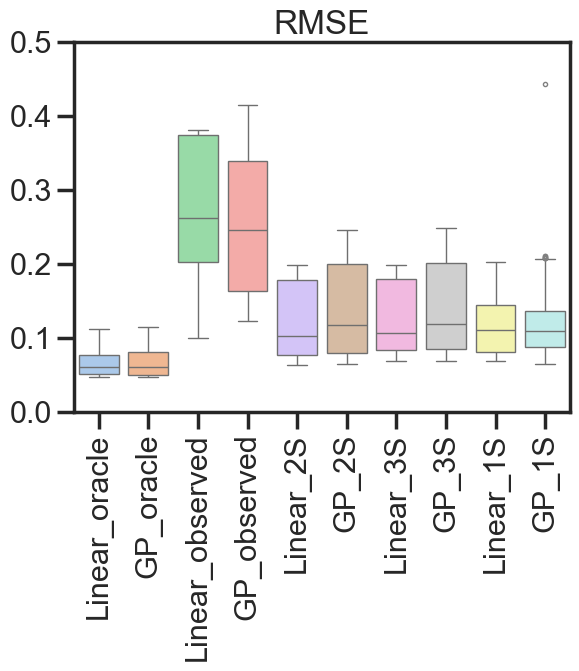

In [22]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

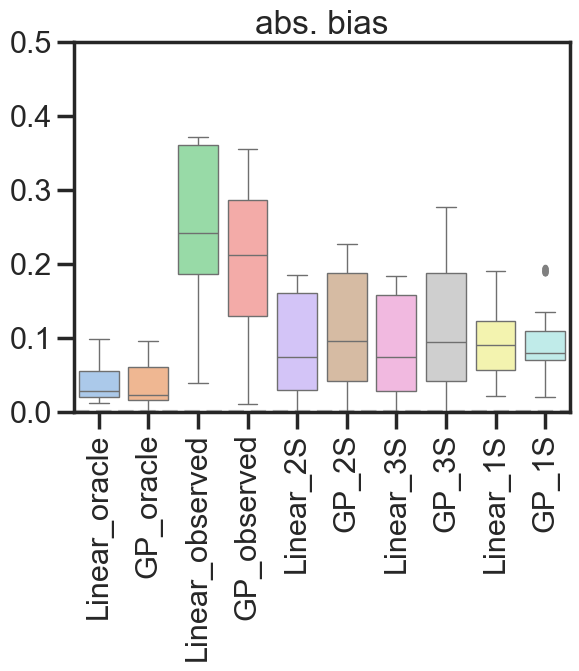

In [31]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

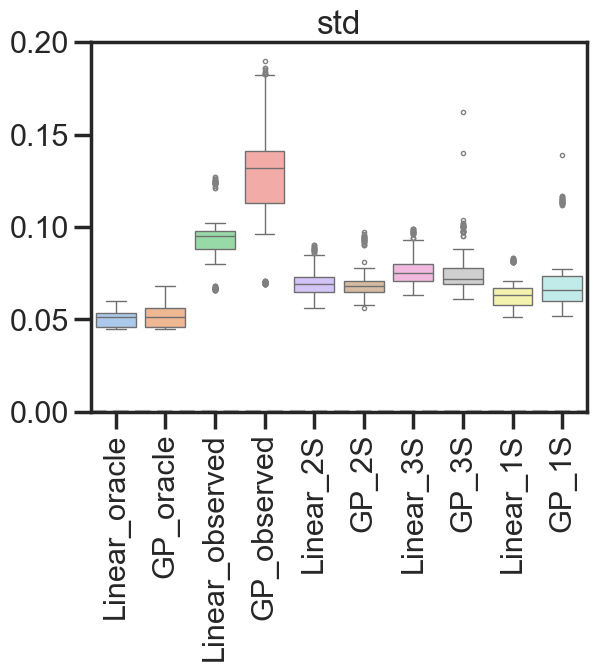

In [35]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std")
plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [22]:
# c95_text = ['{:.2f}%'.format(num) for num in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
# c95_text = [f"{p:.1f}%" for p in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
method_names = combined_df["method"].unique()
c95_max = combined_df.groupby('method').agg({'CI_length95': ['max']}).reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])[('CI_length95', 'max')]
c95_max = [val for val in c95_max]
print(c95_max)

['95%', '89%', '0%', '0%', '0%']
[0.13525835424661642, 0.2776461325585842, 0.2424978442490101, 0.2910009063780308, 0.13876427970826619]


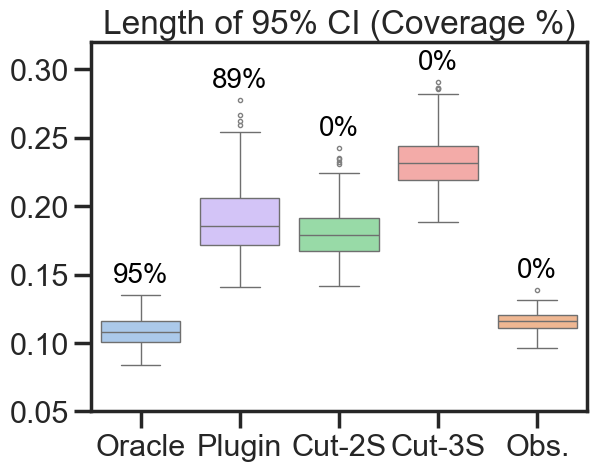

In [23]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_ci95 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops)
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 


Text(0.5, 1.0, 'Length of 99% CI distribution')

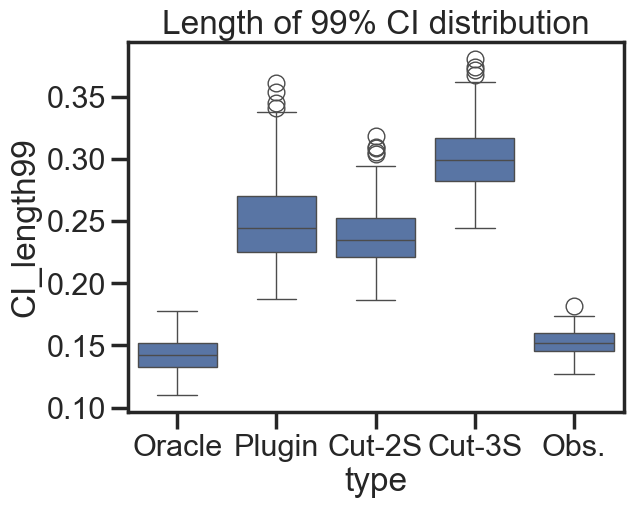

In [24]:
box_ci99 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length99',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])
box_ci99.set_title("Length of 99% CI distribution")

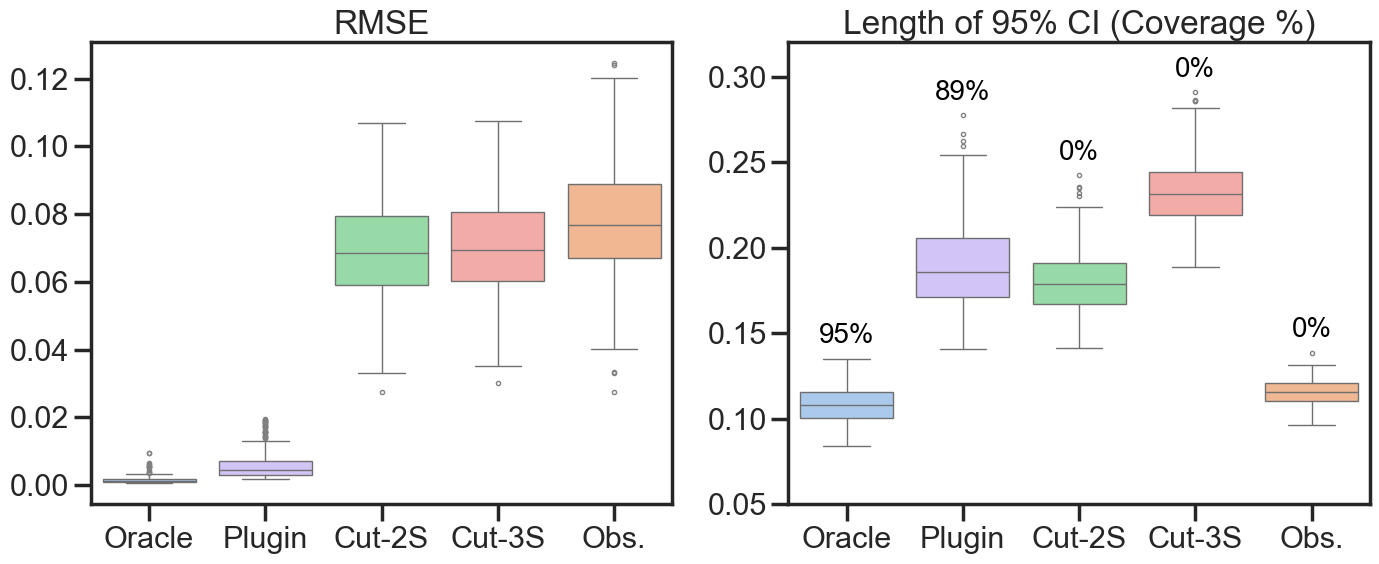

In [25]:
fig, axes = plt.subplots(1, 2)

flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_rmse = sns.boxplot(data=combined_df, x = 'type', y = 'RMSE',
               order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                       hue = "type", palette = 'pastel',
                       flierprops=flierprops,
                       ax=axes[0])
box_rmse.set_title("RMSE")
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

box_ci95 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops,
                       ax=axes[1])
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 
fig = plt.gcf()
fig.set_size_inches(16.5, 6)
fig.savefig('Sim_RMSE_CI_plot.png', dpi=300)
 